In [1]:
import cv2
from pathlib import Path

In [2]:
images_path = Path("/home/ardiya/Workspace/checkbox_classification/data/")
classes = [x for x in images_path.iterdir() if x.is_dir()]
classes_to_image_paths = {
    str(cls.name): list(cls.glob("*.png")) for cls in classes
}
print("size per classes", {k: len(v) for k, v in classes_to_image_paths.items()})

size per classes {'checked': 222, 'other': 138, 'unchecked': 155}


In [3]:
def get_resolution(path: Path):
    img = cv2.imread(str(path))
    return img.shape[:2]

classes_to_resolutions = {
    cls: [get_resolution(pth) for pth in img_paths] for cls, img_paths in classes_to_image_paths.items()
}

checked min_x: 26 min_y: 24
other min_x: 46 min_y: 32
unchecked min_x: 40 min_y: 48


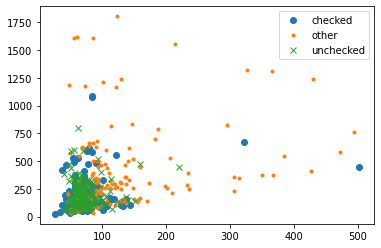

In [4]:
from matplotlib import pyplot as plt

for (class_name, resolutions), marker in zip(classes_to_resolutions.items(), ['o', '.', 'x']):
    xs = [res[0] for res in resolutions]
    ys = [res[1] for res in resolutions]
    print("{} min_x: {} min_y: {}".format(class_name, min(xs), min(ys)))
    plt.plot(xs, ys, marker, label=class_name)
plt.legend(numpoints=1)
plt.show()